# DE/LU Electricity Prices Analysis

This notebook loads and visualizes day-ahead electricity prices for the
German-Luxembourg market area from SMARD data.

## Background

The **SMARD** platform (operated by the German Federal Network Agency,
*Bundesnetzagentur*) is the primary hub for high-resolution electricity market
data in Germany. It serves as a transparent "scoreboard" for the energy
transition.

### What are SMARD Electricity Prices (DE/LU)?

The **DE/LU** price refers to the wholesale cost of electricity for the joint
bidding zone comprising **Germany and Luxembourg**.

- **Uniform Price:** Within this zone, electricity is treated as if it were on
  a "copper plate"—the wholesale price is the same regardless of location.
- **Wholesale vs. Retail:** These are *wholesale* prices (what energy suppliers
  pay on the exchange). Retail bills include additional taxes, grid fees, and
  levies.
- **Volatility:** Prices fluctuate hourly based on weather (wind/solar), demand
  (industrial activity), and fuel prices (natural gas).

### What is Day-Ahead?

The **Day-Ahead Market** is the primary exchange for electricity. Because
electricity is difficult to store, it must be traded before production.

- **The Auction:** Every day at **12:00 CET**, an auction takes place for each
  hour of the *following* day.
- **Clearing Price:** The exchange algorithm finds where supply meets demand.
  This "Market Clearing Price" is what SMARD publishes.

### Connection to Other Bidding Zones

Germany/Luxembourg is part of the **Single Day-Ahead Coupling (SDAC)**, linking
most of Europe. Through interconnectors, electricity flows from low-price areas
(high supply) to high-price areas (high demand). When cables are congested,
prices "split" between zones.

### Daylight Savings Time Transitions

- **Spring (23-hour day):** When clocks jump from 02:00 to 03:00, the 2 AM hour
  is missing from the data.
- **Autumn (25-hour day):** When clocks fall back, the extra hour is labeled
  as **3A and 3B** (or similar). This often shows very low prices due to
  reduced demand and extra generation capacity.

---

## Observations from the Data

### The 2021-2023 Energy Crisis

The most striking feature in the data is the dramatic price surge from mid-2021
through early 2023, with monthly averages peaking above **460 EUR/MWh** in
August 2022—roughly 10x the pre-crisis baseline of ~40 EUR/MWh.

**Primary causes:**

- **Post-COVID recovery (2021):** Economic rebound increased global energy
  demand, particularly for LNG in Asia, tightening European gas supplies.
- **Russia's invasion of Ukraine (Feb 2022):** Russia had supplied ~44% of
  EU natural gas imports. The subsequent supply cuts caused gas prices to surge
  5-fold, directly impacting electricity prices since gas plants often set the
  marginal price.
- **Merit order effect:** In electricity markets, the most expensive plant
  needed to meet demand sets the price for all generators. With gas prices
  soaring, this "marginal" plant became extremely costly.

The crisis peaked in **August 2022** when wholesale prices exceeded 850 EUR/MWh.

### Negative Prices

The hourly data shows prices occasionally dropping below zero (visible as
downward spikes reaching -200 to -500 EUR/MWh). **Negative prices** mean
producers must *pay* to have their electricity taken off the grid.

**Why this happens:**

- **Renewable oversupply:** On sunny, windy days (especially weekends), solar
  and wind generation can exceed demand. Germany added massive renewable
  capacity—the EU installed a record 56 GW of solar in 2023 alone.
- **Inflexible generation:** Nuclear and some coal plants cannot quickly ramp
  down, so they pay to keep running rather than face costly shutdown/restart.
- **Grid congestion:** Limited transmission capacity can trap excess power in
  certain regions.
- **Timing mismatch:** Peak solar production (midday) doesn't align with peak
  demand (mornings/evenings), especially on low-demand weekends.

In H1 2025, Germany experienced **389 hours** of negative day-ahead prices.

### Positive Price Spikes

Extreme upward spikes (600-900+ EUR/MWh) occur during supply scarcity events:

- **Dunkelflaute:** German for "dark doldrums"—periods of cold, cloudy, windless
  weather when renewable output collapses. In December 2024, intraday prices
  briefly hit ~1,000 EUR/MWh during an extended Dunkelflaute.
- **Plant outages:** Unplanned maintenance or failures of conventional plants
  during high-demand periods exacerbate scarcity.
- **Peak demand:** Cold winter evenings with high heating demand and low
  renewable output force reliance on expensive gas "peaker" plants.

These dynamics illustrate why **flexibility** (storage, demand response, grid
expansion) is critical for integrating high shares of variable renewables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from woe.paths import ProjPaths

In [2]:
# Load the price data
paths = ProjPaths()
prices_file = paths.smard_prices_file

print(f"Loading data from: {prices_file}")
df = pd.read_parquet(prices_file)

print(f"Data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
df.head()

Loading data from: /home/chris/research/world-of-energy/data/downloads/smard/prices_de_lu.parquet
Data shape: (64433, 1)
Date range: 2018-10-01 00:00:00 to 2026-02-05 23:00:00


,PRICE_DE_LU
timestamp,
2018-10-01 00:00:00,59.53
2018-10-01 01:00:00,56.10
2018-10-01 02:00:00,51.41
2018-10-01 03:00:00,47.38
2018-10-01 04:00:00,47.59


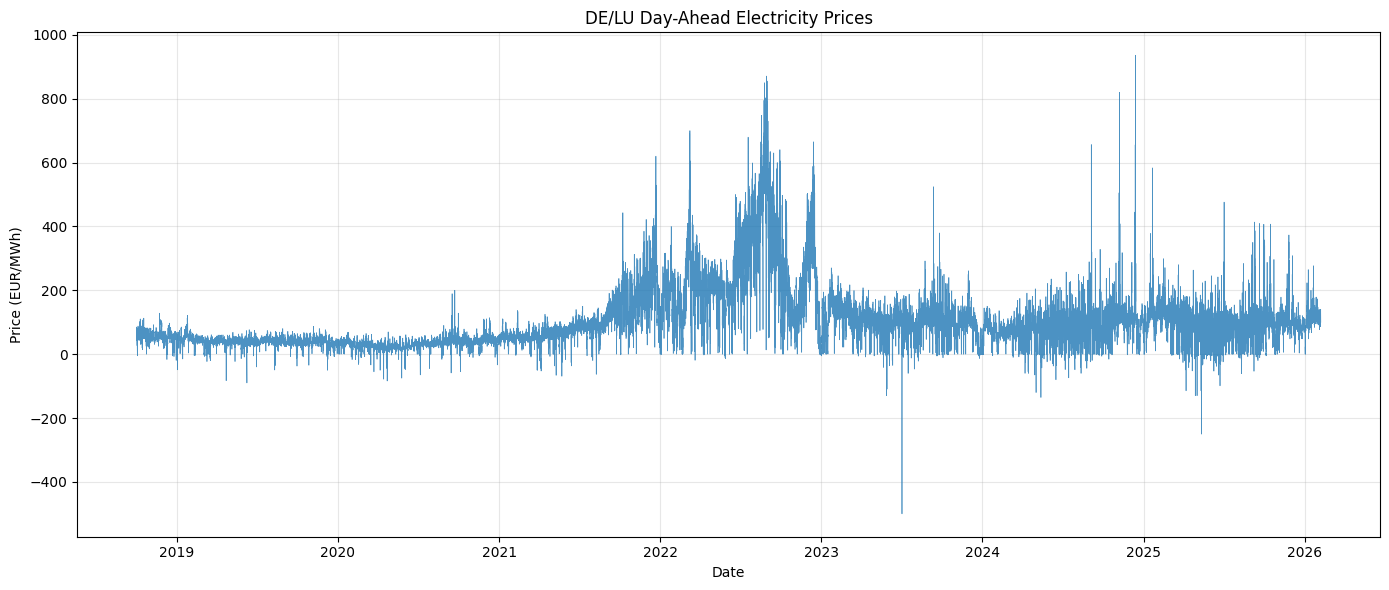

In [3]:
# Time series plot of electricity prices
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df.index, df["PRICE_DE_LU"], linewidth=0.5, alpha=0.8)
ax.set_xlabel("Date")
ax.set_ylabel("Price (EUR/MWh)")
ax.set_title("DE/LU Day-Ahead Electricity Prices")
ax.grid(True, alpha=0.3)

fig.tight_layout()
plt.show()

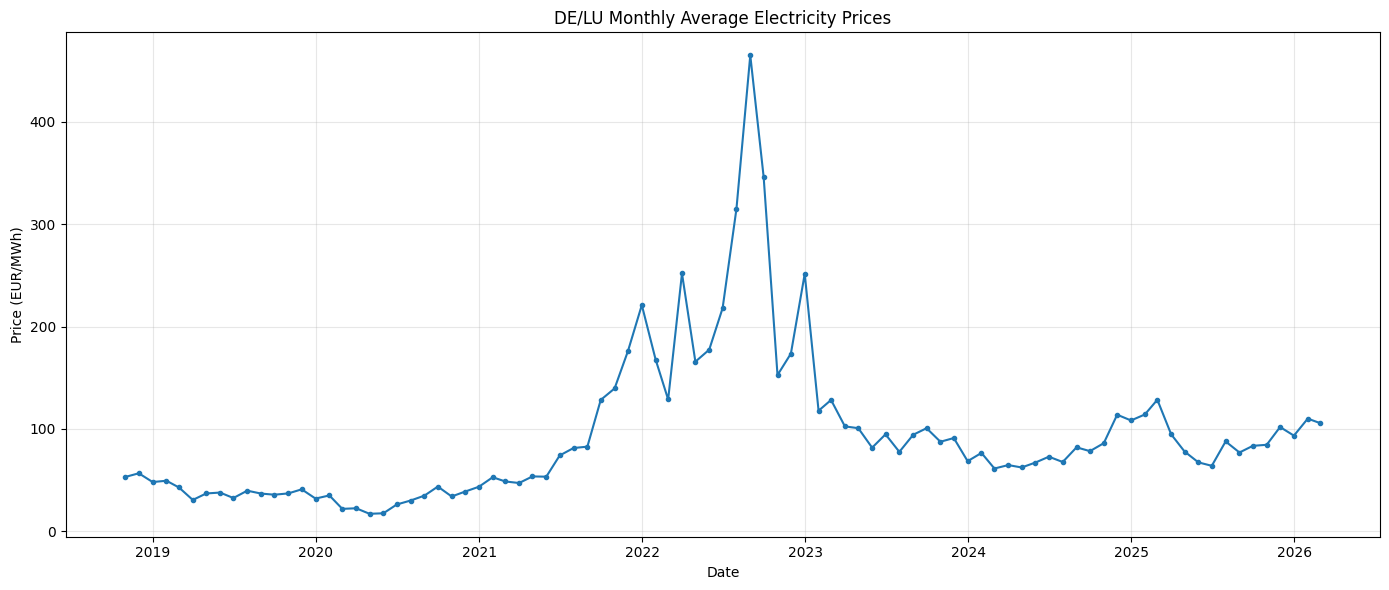

In [4]:
# Monthly average prices
monthly_avg = df.resample("ME").mean()

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(monthly_avg.index, monthly_avg["PRICE_DE_LU"], marker="o", markersize=3)
ax.set_xlabel("Date")
ax.set_ylabel("Price (EUR/MWh)")
ax.set_title("DE/LU Monthly Average Electricity Prices")
ax.grid(True, alpha=0.3)

fig.tight_layout()
plt.show()

In [5]:
from datetime import datetime
from IPython.display import Markdown

Markdown(f"Last run: {datetime.now().strftime('%Y-%m-%d')}")

Last run: 2026-02-05